In [22]:
#all imports
# import local modules.

from model.support_vector_machine import SupportVectorMachine
from utils import data_loader, pre_training_analysis_tools 
from sklearn import svm
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from skopt.space import Real, Categorical, Integer






>> initialising model...
>> training model...
>> describing model...
>> predicting test data...
>> assessing prediction performance...
ESS: 30
RSS: 8
TSS: 72
R-squared: 0.89
correlation: -0.58
0.5370370370370371
Accuracy: 0.45 (+/- 0.11)
Accuracy: 0.55 (+/- 0.22)
              precision    recall  f1-score   support

         1.0       0.46      0.61      0.52        18
         2.0       0.60      0.75      0.67        24
         3.0       0.00      0.00      0.00        12

    accuracy                           0.54        54
   macro avg       0.35      0.45      0.40        54
weighted avg       0.42      0.54      0.47        54



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


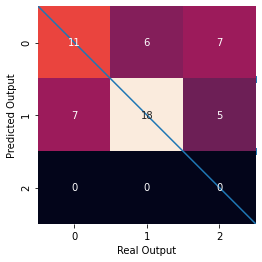

In [4]:
data = data_loader.load_real_dataset(remove_multicollinearity=False, wrapper_svm=True)

data_x = data['train_x']
data_y = data['train_y']
test_x = data['test_x']
test_y = data['test_y']

# determine which model we are using.

# mo = svm.SVC(C=8,gamma=6,kernel='rbf')
mo = svm.SVC()

model = SupportVectorMachine(data, normalize=True, model = mo)
#model.hyperparameter_tuning()
model.train()
model.describe()
model.test()



In [30]:
model = SVC()

cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=5, random_state=1)

# Defines the parameter search space
param_grid = {
                'C': (0.001,1),  
                'gamma': Real(0.001,10), 
                'kernel': ['rbf'],
            }

# Set all the variables for the grid search cross validation 
search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='accuracy')

# perform the search - i.e. it fits the model on the training data set for the different hyper-parameter settings
search_result = search.fit(data_x, data_y)

# Prints the results - optimal hyper-parameters and the accuracy score
print("The best parameters are %s with a score of %0.2f"
    % (search_result.best_params_, search_result.best_score_))

# Displays all of the hyper-parameters combination in descending order of accuracy score
grid_results = pd.concat([pd.DataFrame(search_result.cv_results_["params"]),pd.DataFrame(search_result.cv_results_["mean_test_score"], columns=["accuracy"])],axis=1)
grid_results.sort_values(by=['accuracy'], inplace=True, ascending=False)
print(grid_results.head)



The best parameters are {'C': 1e-16, 'kernel': 'rbf'} with a score of 0.44
<bound method NDFrame.head of               C kernel  accuracy
0  1.000000e-16    rbf  0.439785
1  1.000000e-06    rbf  0.439785
2  1.000000e-04    rbf  0.439785
3  5.000000e-04    rbf  0.439785
4  1.000000e-03    rbf  0.439785
5  5.000000e-03    rbf  0.439785
6  1.000000e-02    rbf  0.439785
7  1.000000e+00    rbf  0.425008>


In [13]:
error_rate = []
# Might take some time
for i in range(0.001,1):
    
    # Set up the hyperparameters
    # Instantiate the metric learner

    # Train the metric learner
    model = SVC(C=i,gamma=10,kernel='rbf')
    model.fit(data_x,data_y)

    pred_i = model.predict(test_x)
    error_rate.append(np.mean(pred_i != test_y))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,1000),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

# want to choose k with the least error rate
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

TypeError: 'float' object cannot be interpreted as an integer

Text(0, 0.5, 'Error Rate')

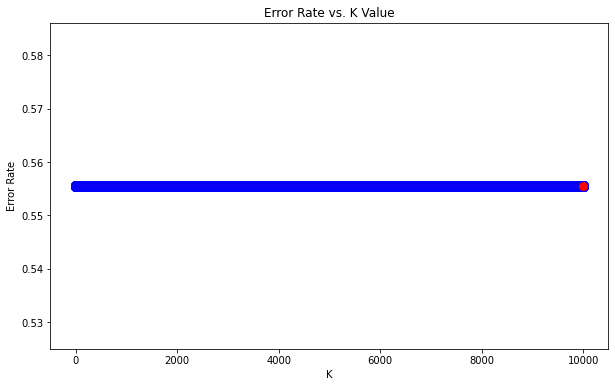

In [33]:
error_rate = []
# Might take some time
for i in range(1,10000):
    
    # Set up the hyperparameters
    # Instantiate the metric learner

    # Train the metric learner
    model = SVC(C=0.001,gamma=i,kernel='rbf')
    model.fit(data_x,data_y)

    pred_i = model.predict(test_x)
    error_rate.append(np.mean(pred_i != test_y))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10000),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

# want to choose k with the least error rate
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')